In [165]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

In [7]:
policy = np.load('../rl/dynamic_td/final_case/final_greedy_policy_12min_charging_limit_iter5x120.npy')
sessions = pd.read_csv('../data/sessions.csv', index_col=0)

In [8]:
sessions.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,end_soc,start_soc,start_day_idx,end_day_idx,max_energyCharged
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:33:00,11,2018-12-21 19:46:00,19.0,29.87,8.216667,Dec,Friday,late morning (9-12),Between 6 and 9 hours,1,0.631,69,118,82.166667
5,6,AdO3,AdO3-2,Private,NaN,2018-12-24 23:32:00,23,2018-12-25 17:37:00,17.0,16.14,18.083333,Dec,Monday,late evening (21-midnight),More than 18 hours,1,0.800,141,105,180.833333
6,7,AdO3,AdO3-2,Private,NaN,2018-12-25 18:25:00,18,2018-12-26 16:08:00,16.0,10.33,21.716667,Dec,Tuesday,early evening (18-21),More than 18 hours,1,0.872,110,96,217.166667
7,8,AdO3,AdO3-4,Private,NaN,2018-12-26 10:41:00,10,2018-12-26 16:52:00,16.0,27.66,6.183333,Dec,Wednesday,late morning (9-12),Between 6 and 9 hours,1,0.658,64,101,61.833333
8,9,AdO3,AdO3-2,Private,NaN,2018-12-26 18:46:00,18,2018-12-26 21:08:00,21.0,8.83,2.366667,Dec,Wednesday,early evening (18-21),Less than 3 hours,1,0.891,112,126,23.666667


In [161]:
if 6 > 5:
    if 1 > 1:
        print('a')
else:
    print('c')

In [166]:
highSOC_charging = np.zeros((int(1/0.02), 120))
for i, deltaSOC in enumerate(np.linspace(0, 1, int(1/0.02))):
    for j, deltaT in enumerate(np.arange(0, 120)):

        T_to_soc_target = deltaSOC / 0.02
        # if 3 * T_to_soc_target < deltaT:
        #     highSOC_charging[i, j] = 1
        if (T_to_soc_target**1.3 < deltaT) & (deltaSOC <= 0.25 or deltaSOC >= 0.35):
            highSOC_charging[i, j] = 1
        elif T_to_soc_target < deltaT:
            highSOC_charging[i, j] = 0.25
        else:
            pass

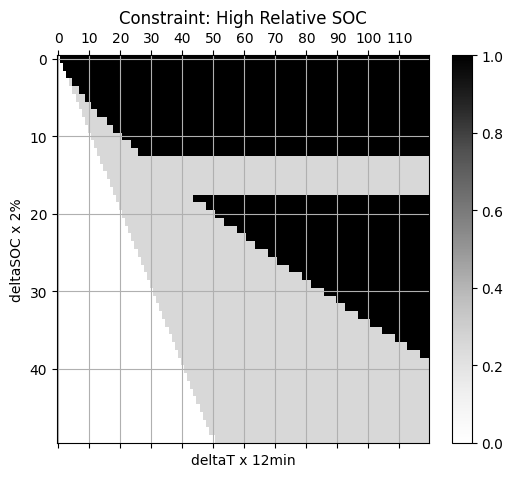

In [167]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
# plt.yticks(np.arange(0, 50, 10), np.linspace(0, 1, 5).round(1))
plt.title('Constraint: High Relative SOC')
plt.grid()
plt.colorbar()
plt.show()

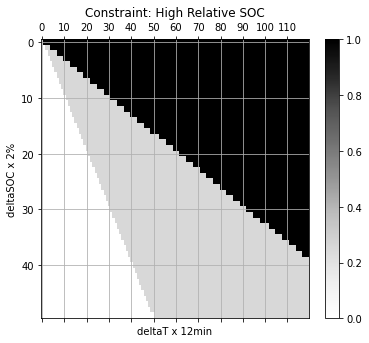

In [122]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
# plt.yticks(np.arange(0, 50, 10), np.linspace(0, 1, 5).round(1))
plt.title('Constraint: High Relative SOC')
plt.grid()
plt.colorbar()
plt.show()

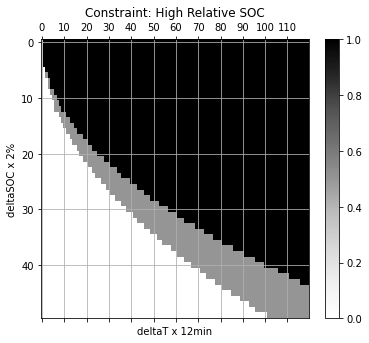

In [94]:
plt.figure(figsize=(6, 5))
plt.matshow(highSOC_charging, fignum=1, aspect='auto', cmap=mpl.cm.Greys)
plt.xlabel('deltaT x 12min')
plt.ylabel('deltaSOC x 2%')
plt.xticks(np.arange(0, 120, 10))
# plt.yticks(np.arange(0, 50, 10), np.linspace(0, 1, 5).round(1))
plt.title('Constraint: High Relative SOC')
plt.grid()
plt.colorbar()
plt.show()

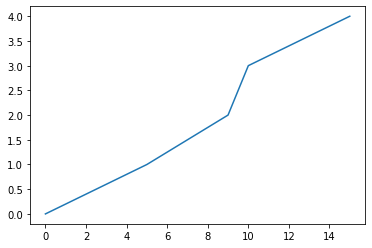

In [27]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.show()